# Red Neuronal Densa TensorFlow

## Predicción de Precio de casas Housing Dataset

### Ángel Isaac Gómez Canales

## Paso 1. Importar paquetería necesaria 📦

In [228]:
# Paqueteria basica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tensorflow y keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# Funcionalidades basicas de sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Paso 2. Cargar los datos 💾

In [229]:
data = pd.read_csv("../Datasets/Housing.csv")  # Cambiar la ruta a la adecuada

## Paso 3. Inspeccionar los datos 🔎

A continuacion se muestran los primeros 5 datos del datset para observar el formato que tienen los datos

In [230]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [231]:
data.shape

(545, 13)

Información del Dataset para conocer sus columnas y  ver si tiene valores nulos que se deban eliminar

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [233]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

De aquí vemos que exceptuando la última columna, el dataset está completo, no tiene valores nulos que sea necesario eliminar,
Ahora mostramos las estadisticas de las columnas con datos numéricos para ver si es necesario escalar los datos

In [234]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Se observa que hay columnas que toman valores en el orden de $10^{0}$, mientras que otras toman valores en el rango de $10^{4}$, por lo que será necesario escalar los datos.

Ahora veremos que información contienen las columnas no numéricas

In [235]:
data.select_dtypes(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


Estas columnas las codificaremos mas adelante

## Paso 3. Preprocesamiento de los datos 🛠️

Comenzamos por codificar las variables no numéricas de las siguiente manera:
- Para variables que contienen "yes" o "no" se asignaran valores de 0 y 1
- Para la columna "furnishingstatus" se asignaran valores de 0, 1 y 2 a cada categoria

In [236]:
LE_yes = LabelEncoder()
LE_yes.fit(["no", "yes"])
LE_fur = LabelEncoder()
LE_fur.fit(data["furnishingstatus"].unique())
# Sustituir las columnas por la version codificada
for columna in data.select_dtypes(include="object").columns[:-1]:
    data[columna] = LE_yes.transform(data[columna])
    
data["furnishingstatus"] = LE_fur.transform(data["furnishingstatus"])

In [237]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


A continuación, separamos las variables de entrada de las salidas

In [238]:
X = data.drop(columns="price")
Y = data["price"].to_numpy()

El siguiente paso es escalar los datos para que tengan rangos similares y poder entrenar la red de mejor manera

In [239]:
X = StandardScaler().fit_transform(X)

Finalmente, particionamos los datos con el 90% para entrenamiento y el 10% para prueba

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Paso 4. Diseñar Red Neuronal 👨‍💻

Definimos la funcion para r2score

In [241]:
def r2score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [242]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.L1L2(0.1, 0.1)))
model.add(keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.1, 0.25)))
model.add(keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.1, 0.25)))
model.add(keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.1, 0.25)))
model.add(keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.1, 0.25)))
model.add(keras.layers.Dense(1, activation="linear"))
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.legacy.Adam(), metrics=[keras.metrics.mean_absolute_error, r2score])

In [243]:
# Resumen del modelo
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 256)               3328      
                                                                 
 dense_224 (Dense)           (None, 128)               32896     
                                                                 
 dense_225 (Dense)           (None, 64)                8256      
                                                                 
 dense_226 (Dense)           (None, 32)                2080      
                                                                 
 dense_227 (Dense)           (None, 16)                528       
                                                                 
 dense_228 (Dense)           (None, 1)                 17        
                                                                 
Total params: 47,105
Trainable params: 47,105
Non-tra

## Paso 5. Entrenar la Red Neuronal 🧠💪

In [244]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 26392167186432.0000 - mean_absolute_error: 4780749.0000 - r2score: -7.4538 - val_loss: 24624880418816.0000 - val_mean_absolute_error: 4641813.0000 - val_r2score: -7.2826
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 26392039260160.0000 - mean_absolute_error: 4780736.5000 - r2score: -7.5892 - val_loss: 24624519708672.0000 - val_mean_absolute_error: 4641777.0000 - val_r2score: -7.2825
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 26391099736064.0000 - mean_absolute_error: 4780646.5000 - r2score: -7.0484 - val_loss: 24622261075968.0000 - val_mean_absolute_error: 4641558.5000 - val_r2score: -7.2817
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 26386072862720.0000 - mean_absolute_error: 4780181.5000 - r2score: -7.1940 - val_loss: 24611618029568.0000 - val_mean_absolute_error: 4640549.0000 - val_r2score: -7.2781
Epoch 5/100
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 1215444942848.0000 - mean_absolute_error: 823912.3125 - r2score: 0.5933 - val_loss: 1183613059072.0000 - val_mean_absolute_error: 834949.6875 - val_r2score: 0.6078
Epoch 36/100
16/16 [==============================] - 0s 2ms/step - loss: 1208855035904.0000 - mean_absolute_error: 824571.6875 - r2score: 0.6145 - val_loss: 1192209809408.0000 - val_mean_absolute_error: 839007.8750 - val_r2score: 0.6046
Epoch 37/100
16/16 [==============================] - 0s 2ms/step - loss: 1189716819968.0000 - mean_absolute_error: 811407.8125 - r2score: 0.6274 - val_loss: 1112246190080.0000 - val_mean_absolute_error: 812664.4375 - val_r2score: 0.6351
Epoch 38/100
16/16 [==============================] - 0s 2ms/step - loss: 1180988604416.0000 - mean_absolute_error: 806359.1250 - r2score: 0.6156 - val_loss: 1148455223296.0000 - val_mean_absolute_error: 823905.7500 - val_r2score: 0.6208
Epoch 39/100
16/16 [==============================] - 0s 2ms/

16/16 [==============================] - 0s 2ms/step - loss: 1021227499520.0000 - mean_absolute_error: 746722.1250 - r2score: 0.6819 - val_loss: 1036653953024.0000 - val_mean_absolute_error: 772174.9375 - val_r2score: 0.6601
Epoch 70/100
16/16 [==============================] - 0s 2ms/step - loss: 1019772600320.0000 - mean_absolute_error: 741034.0625 - r2score: 0.6725 - val_loss: 1087529484288.0000 - val_mean_absolute_error: 793616.4375 - val_r2score: 0.6405
Epoch 71/100
16/16 [==============================] - 0s 2ms/step - loss: 1014016507904.0000 - mean_absolute_error: 743018.0625 - r2score: 0.6971 - val_loss: 1071334883328.0000 - val_mean_absolute_error: 784331.4375 - val_r2score: 0.6475
Epoch 72/100
16/16 [==============================] - 0s 2ms/step - loss: 1015928061952.0000 - mean_absolute_error: 745174.8750 - r2score: 0.6923 - val_loss: 1084528787456.0000 - val_mean_absolute_error: 790436.1875 - val_r2score: 0.6421
Epoch 73/100
16/16 [==============================] - 0s 2ms/

Graficamos ahora las curvas de aprendizaje para un mejor diagnóstico del aprendizaje

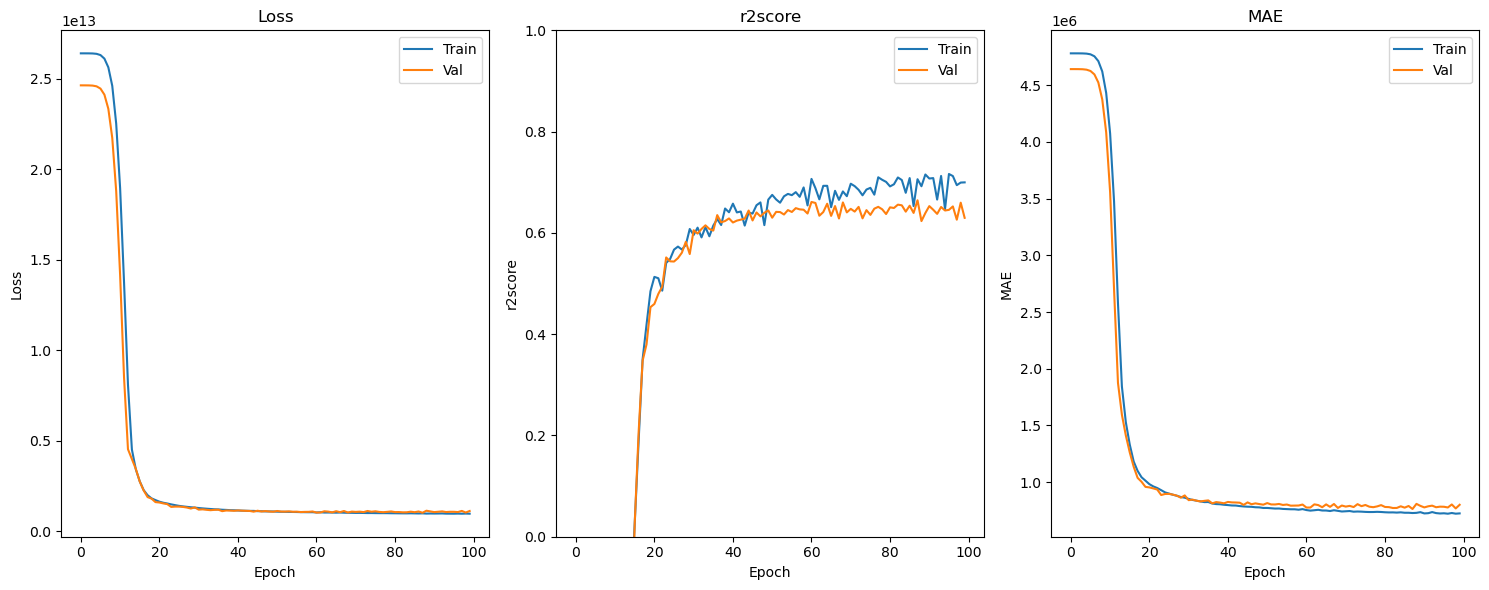

In [247]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(15, 6))
    plt.subplot(131)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label="Train")
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val')
    #plt.yscale('log')
    plt.legend()

    plt.subplot(132)
    plt.title('r2score')
    plt.xlabel('Epoch')
    plt.ylabel('r2score')
    plt.plot(hist['epoch'], hist['r2score'], label="Train")
    plt.plot(hist['epoch'], hist['val_r2score'], label = 'Val')
    plt.ylim([0,1])
    plt.legend()
    
    
    
    plt.subplot(133)
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label="Train")
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
     
plot_history(history)

## Paso 6. Evaluar el modelo con el test set

Metricas de desempeño; r2 score, error absoluto medio, raiz cuadrada del error cuadrado medio

In [246]:
Y_pred = model.predict(X_test, verbose=0)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

metricas = pd.DataFrame({"r2 score": [r2], "MAE": [mae], "RMSE": [rmse]})
metricas

,r2 score,MAE,RMSE
0,0.636159,800228.186364,1.058332e+06
